**CS596 - Machine Learning**
<br>
Date: **30 November 2020**


Title: **Lecture 12**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

<h1 align="center">Dimensionality Reduction</h1>

<h3 align="center">Principal Component Analysis (PCA)</h3>

- **Principal Component Analysis (PCA)** is a dimensionality reduction technique that enables you to identify correlations and patterns in a data set so that it can be transformed into a data set of significantly lower dimension without loss of any important information.


- The standard context for PCA as an exploratory data analysis tool involves a dataset with observations on $m$ numerical $vectors$, for each of $n$ $features$. 


- These $m$ numerical values define $n$-dimensional vectors $\{x_1, ..., x_m\}$, where $x_i = \{x_{1i}, ..., x_{ni}\}$ for $i = \overline{1, m}$. ($x_{ij} \in \mathbb{R}$ for $i=\overline{1,m}$ and $j=\overline{1,n}$).


- Or, equivalently, data is defined as $m \times n$ data matrix $X =(x_{ij})$.

<h3 align="center">Application of matrices for solving a system of linear equations</h3>

- A general system of $m$ linear equations with $n$ unknowns can be written as:
  
  $$\begin{matrix}
\alpha_{11} x_1 + \alpha_{12} x_2 + \cdots + \alpha_{1n} x_n = b_1\\ 
\alpha_{21} x_1 + \alpha_{22} x_2 + \cdots + \alpha_{2n} x_n = b_2\\  
\vdots \\
\alpha_{m1} x_1 + \alpha_{12} x_2 + \cdots + \alpha_{mn} x_n = b_m
\end{matrix}$$

  where $x_1, ..., x_n$ are the unknowns, $\alpha_{11}, ..., \alpha_{mn}$ are the coefficients of the system, and $b_1, ..., b_m$ are the constant terms.


- We can write this system of linear equations in the equivalent matrix form:
  
  $$Ax = b,$$
  
  
  $$\text{where } A = 
\begin{bmatrix}
\alpha_{11} & \alpha_{12} & \cdots  & \alpha_{1n} \\ 
\alpha_{21} & \alpha_{11} & \cdots  & \alpha_{2n} \\ 
\vdots & \vdots & \ddots  & \vdots \\ 
\alpha_{n1} & \alpha_{11} & \cdots  & \alpha_{nn} 
\end{bmatrix}
\text{, }
x = 
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n \\
\end{bmatrix}
\text{ and }
b = 
\begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_m \\
\end{bmatrix}
$$

<h3 align="center">Singular Value Decomposition (SVD)</h3>

- The matrix $AA^T$ and $A^TA$ are very special in linear algebra, since they has next useful properties:
  - they are symmetrical;
  - they are square;
  - both matrices have the same positive eigenvalues;
  - both have the same rank: $\rho(AA^T)=\rho(A^TA)=\rho(A)$;


- Let $u_i$ and $v_i$ be the eigenvectors of $AA^T$ and $A^TA$ respectively: $(AA^T)u_i = \sigma_i u_i$ and $(A^TA)v_i = \sigma_i v_i$;


- The eigenvectors $u_i$ and $v_i$ are called the $singular$ $vectors$ and the square roots of $\sigma_i$ eigenvalues are called $singular$ $values$ of the matrix $A$.

- **Theorem**:

  Let $A$ be the matrix of the linear transformation $A$ over the $n$-dimensional vector space $\mathcal{V}$. 
  
  Then $A$ can be factorized as:

  $$A = USV^T,$$
  
  where $U$ and $V$ are $m \times r$ and $r \times n$ orthogonal matrices.
  
  Matrices are orthogonal if $UU^T = U^TU = I$ and $VV^T = V^TV = I$, with eigenvectors chosen from $AA^T$ and $A^TA$ respectively.

  $S$ is an $r \times r$ diagonal matrix with elements equal to the **root of the positive eigenvalues** of $AA^T$ or $A^TA$.

- **Proof**:

  Lets consider the eigenvectors and eigenvalues of the matrix $AA^T$ and $A^TA$ :

  $$AA^T u_i = \sigma_i u_i \text{, for } i =\overline{1,m};$$
  
  $$A^TA v_i = \sigma_i v_i \text{, for } i =\overline{1,n}.$$

  We can write these equations in matrix form:

  $$AA^T U = U S^2 \text{ and } A^TA V = V S^2,$$

  where $U = \{u_1, ..., u_m\}$, $V = \{v_1, ..., v_n\}$ and $S = diag(\sigma_1, ... , \sigma_r, 0, ..., 0).$<br>

  Remembering, that $UU^T = I$ and $V^TV = I$, we have:

  $$AA^T = U S^2 U^T = U S V^T V S U^T = (U S V^T)(U S V^T)^T.$$

  Therefore, $A$ can be expressed in the form:

  $$A = U S V^T.$$

<h3 align="center">Visualisation of SVD</h3>

- PCA can be thought of as **fitting** a $D$-**dimensional ellipsoid** to the data, where **each axis** of the ellipsoid represents a **principal component**. 

- If some **axis** of the ellipsoid is **small**, then the **variance** along that axis is **also small**.

<img src="images/L12_SVD.jpg" width="1500" height="300" alt="Example" />

<h3 align="center">Step by step computation of PCA</h3>

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data set;

2. Calculation of the covariance matrix;

3. Calculation of the singular values and singular vectors and factorization of the covariance matrix;

4. Calculation of the Prinipal omponents and reduction of the data set size;

5. Data reconstruction from a reduced data set;

6. Validation of the reconstricted data.

<h3 align="center">Step 1: Standardization of the data</h3>

- The properties of PCA have some **undesirable features** when variables are measures in **different units**;


- To **overcome** this undesirable feature, it is common practice to begin by **standardizing** the variables;


- Standardization is carried out by replacing initial data matrix $X$ with the standardized data matrix $Y$;


- Each data value $x_{ij}$ is both centered and divided by the standard deviation $s_j$ of the $n$ observations of the variable $j$:

  $$y_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j},$$

  $$\text{where } \bar{x}_j = \frac{1}{m}\sum_{i=1}^{m} x_{ij} \text{ and } s_j^2 = \frac{1}{m-1} \sum_{i=1}^{m}(x_{ij} - \bar{x}_j)^2.$$

<h3 align="center">Step 2: Computing the covariance matrix $\Sigma$</h3>

- A covariance matrix $\Sigma$ expresses the **correlation between each two different features** in the data set:

  $$\Sigma =  
\begin{bmatrix}
cov[y_1, y_1] & cov[y_1, y_2] & \cdots & cov[y_1, y_n]\\
cov[y_2, y_1] & cov[y_2, y_2] & \cdots & cov[y_2, y_n]\\
\vdots & \vdots & \ddots & \vdots\\ 
cov[y_n, y_1] & cov[y_m, y_2] & \cdots & cov[y_n, y_n]\\ 
\end{bmatrix}
,$$

  where where each element represents the **covariance between two features** (remember that $y_i$ are centered variables):
$$cov[y_i, y_j] = \frac{1}{m-1} \sum_{k=1}^{m} (y_i)(y_j)^T.$$


- If the covariance value is **negative**, then the respective features are **indirectly proportional** to each other;


- A **positive** covariance denotes that the respective features are **directly proportional** to each other.

<h3 align="center">Step 3: Calculating the singular values and singular vectors</h3>

- The next step is to factorize the matrix $\Sigma$ using the SVD:

  $$\Sigma = U S V^T,$$


- $U$ and $V$ are $n \times n$ orthogonal matrices, i.e. $UU^T = U^TU = I$ and $VV^T = V^TV = I$,
with singular vectors chosen from $\Sigma\Sigma^T$ and $\Sigma^T\Sigma$ respectively. 


-  The $S$ is an $n \times n$ diagonal matrix with elements equal to the $\sqrt{\sigma_i}$ of the singular values of $\Sigma\Sigma^T$ or $\Sigma^T\Sigma$.


-  Singular values are sorted in descending order: $\sigma_1 \geq \sigma_2, .... \geq \sigma_n$.

<h3 align="center">Step 4: Computing the Principal Components (PC)</h3>

- **Principal Components (PC)** are the new set of variables that are obtained from the initial set of variables;


- Once we have computed the **singular values** and **singular vectors**, we order them in the **descending order**, where the singular vector with the **highest singular value** is the most significant and forms the first principal components.


- The principal components of **lesser significances** can thus be **removed** in order to **reduce the dimensions** of the data.


- Thus we take first $k \leq n$ columns of $U$ and consider new matrix $U_k$:

  $$U_k = \{u_1, ..., u_k\}.$$

<h3 align="center">Step 5: Reducing the dimensions of the data set</h3>

- The last step in performing PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. 


- In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.


- Thus newly formed Principal Components are:

  $$z_i = U_k^T y_i.$$


- Since $U_k^T \in \mathbb{R}^{k\times n}$ and $y_i \in \mathbb{R}^{n}$, thus $z_i \in \mathbb{R}^{n}$.

<h3 align="center">Step 6: Validation of the reconstricted data</h3>

- We can approximate the reconstruction of the original value by ${y_{i}}' = U_{k}z_{i}$ and compare it with the original value $y_i$:

  $$\frac{
\frac{1}{m}\sum_{i=1}^{m} \left \| y_{i} - {y_{i}}' \right \|^{2}
}{
\frac{1}{m}\sum_{i=1}^{m} \left \| y_{i} \right \|^{2}
} \leq \epsilon$$

  where $\epsilon$ is the $proportion \text{ } of \text{ } total \text{ } variance$.

  Using the next inequality:

  $$\frac{
\frac{1}{m}\sum_{i=1}^{m}\left \| y_{i} - {y_{i}}' \right \|^{2}
}{
\frac{1}{m}\sum_{i=1}^{m}\left \| y_{i} \right \|^{2}
} \leq 1 -
\frac{
\sum_{i=1}^{k}S_{ii}
}{
\sum_{j=1}^{n}S_{jj}
},$$

  we can write:

  $$\frac{
\sum_{i=1}^{k}S_{ii}
}{
\sum_{j=1}^{n}S_{jj}
} \geq \epsilon$$


- It is common practice $\epsilon = 70\%$ is used to decide how many PCs should be retained.

<BarContainer object of 50 artists>

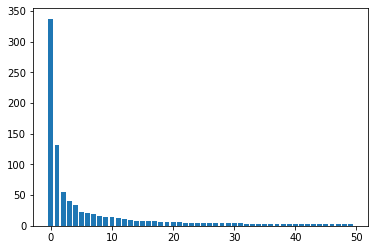


<h1 align="center">End of Lecture</h1>